##Trabajo de programación Nº 3
##LFIS419 - Inteligencia Artificial
Entrega Miércoles 10 de mayo a través del Aula Virtual

##Instrucciones Generales:

*   Siga las instrucciones del notebook
*   Cambie el Nombre del Archivo, indicando el Nº del trabajo y el número del grupo (para trabajos grupales) o su nombre (para trabajos individuales)
*   Use las celdas de texto, para explicar los objetivos del código y comentar los resultados obtenidos.
*   Use comentarios dentro del código para explicar cómo funciona, por qué usa tal o cual comando, que contienen las variables, etc.
*   Edite la celda siguiente, para completar el nombre, rut y correo del (de los) integrante(s).








## Identificación del (de los) Estudiante(s):
<table>
<tr>
<th> Nombre </th>
<th> RUT </th>
<th> email </th>
</tr>
<tr>
<td> Bastián Muñoz </td>
<td> 20.183.097-4 </td>
<td> bastian.munozp@alumnos.uv.cl </td>
</tr>
<tr>
<td> Fabian Trigo </td>
<td> 20.183.107-5 </td>
<td> fabian.trigo@alumnos.uv.cl </td>
</tr>
</table>

## Instrucciones específicas
En este trabajo exploraremos un dataset usado previamente con técnicas de machine learning y obtenido desde https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease (visitado el 3 de mayo de 2023). Revisar la descripción de estos datos en la página original.

En el aula virtual está disponible el archivo chronic_kidney_disease.arff, el que deben subir a Google Colab y completar las actividades descritas.

El objetivo es crear un modelo de ML para predecir la presencia o no de la enfermedad de riñón crónica. Para ello explorarán Random Forest y Support Vector Machine, alimentado con los datos en bruto y después de reducción de dimensionalidad.

## Actividad 1: Análisis previo y pre-proceso

Analice las variables de entrada al modelo, identificado cuales de ellas tienen una alta correlación (entre ellas y/o con la clase a la que corresponden).

Prepare las variables para que puedan ser procesadas tanto por Random Forest como por Support Vector Machine.

Justifique las decisiones tomadas.

In [12]:
# esta primera linea es util para google colab
!git clone https://github.com/fbientrigo/machine-learning.git
path_archivo = "/content/machine-learning/Curso IA/0502 - trabajo 3/chronic_kidney_disease.arff"
#path_archivo = "chronic_kidney_disease.arff"



fatal: destination path 'machine-learning' already exists and is not an empty directory.


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = []
with open(path_archivo, "r") as f:
    for line in f:
        line = line.replace('\n', '')
        data.append(line.split(','))


names = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
         'bgr', 'bu',  'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
         'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
         'class', 'no_name']
    
df = pd.DataFrame(data[145:], columns=names)

# mapeo los valores que no sirve
df.drop('no_name', axis=1, inplace=True)
df = df.replace(['?', None, '', '\t?'], np.nan)

df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,NaN,70,1.015,4,0,abnormal,normal,notpresent,notpresent,104,...,NaN,NaN,NaN,no,no,no,good,yes,no,ckd
1,NaN,70,1.020,0,0,NaN,NaN,notpresent,notpresent,219,...,37,9800,4.4,no,no,no,good,no,no,ckd
2,55,70,1.010,3,0,NaN,normal,notpresent,notpresent,99,...,NaN,NaN,NaN,no,no,no,poor,yes,no,ckd
3,60,70,1.010,0,0,NaN,normal,notpresent,notpresent,140,...,NaN,NaN,NaN,no,no,no,good,no,no,ckd
4,72,90,1.025,1,3,NaN,normal,notpresent,notpresent,323,...,NaN,NaN,NaN,no,yes,yes,poor,no,no,ckd


In [73]:
def cambiar_tipo(dataframe, columnas, tipo):
    """ cambiar el tipo de dato de una columna """
    if len(columnas) == 1:
        dataframe[columnas] = dataframe[columnas].astype(tipo) 
    else:
        for columna in columnas:
            dataframe[columna] = dataframe[columna].astype(tipo)

In [74]:
# regular expression

import re

def get_columnas(tipo = 'numeric'):
    """ buscamos que columnas son numericas, usando regular expressions """
    matches = []
    reg_line = re.compile(f"@attribute .* {tipo}")
    reg = re.compile(r"\s\'\w*\'\s")

    with open(path_archivo, "r") as f:
        for line in f:
            line_regexp = reg_line.findall(line)
            if line_regexp:       
                matches += reg.findall(reg_line.findall(line)[0])

            line = line.replace('\n', '')
            data.append(line.split(','))
    matches = list(map(lambda x: x[2:-2], matches))
    return matches

In [75]:
columnas_numericas = get_columnas('numeric')
print(columnas_numericas)

cambiar_tipo(df, columnas_numericas, np.float64)

['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']


In [76]:
# de esa forma tenemos cambiadas las numericas
df.dtypes

age      float64
bp       float64
sg        object
al        object
su        object
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

In [77]:
# cambiamos le tipo de la etiqueta, primero limpiamos
print(df['class'].unique())

df['class'] = df['class'].replace(['ckd\t'], 'ckd')
df['class'] = df['class'].replace(['no'], 'notckd')

['ckd' 'ckd\t' 'notckd' 'no' nan]


In [78]:
print(df['class'].unique())

['ckd' 'notckd' nan]


In [79]:
# luego cambiamos a tipo de dato numerico
df['class'] = df['class'].replace(['ckd'], 1)
df['class'] = df['class'].replace(['notckd'], 0)

cambiar_tipo(df,['class'], np.float64)

df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,NaN,70.0,1.015,4,0,abnormal,normal,notpresent,notpresent,104.0,...,NaN,NaN,NaN,no,no,no,good,yes,no,1.0
1,NaN,70.0,1.020,0,0,NaN,NaN,notpresent,notpresent,219.0,...,37.0,9800.0,4.4,no,no,no,good,no,no,1.0
2,55.0,70.0,1.010,3,0,NaN,normal,notpresent,notpresent,99.0,...,NaN,NaN,NaN,no,no,no,poor,yes,no,1.0
3,60.0,70.0,1.010,0,0,NaN,normal,notpresent,notpresent,140.0,...,NaN,NaN,NaN,no,no,no,good,no,no,1.0
4,72.0,90.0,1.025,1,3,NaN,normal,notpresent,notpresent,323.0,...,NaN,NaN,NaN,no,yes,yes,poor,no,no,1.0


In [80]:
# cambiamos tambien los datos de hipertension, diabetes y coronary artery
clases_yesno = ['htn', 'dm', 'cad', 'pe', 'ane']

df[clases_yesno]= df[clases_yesno].replace('yes', 1)
df[clases_yesno]= df[clases_yesno].replace('\tyes', 1)
df[clases_yesno] = df[clases_yesno].replace('no', 0)
df[clases_yesno] = df[clases_yesno].replace('\tno', 0)

In [81]:
# cambiamos los present not present
clases_pnp = ['pcc', 'ba']

df[clases_pnp]= df[clases_pnp].replace('present', 1)
df[clases_pnp] = df[clases_pnp].replace('notpresent', 0)

In [82]:
# la clase normal abnormal
clases_normal= ['pc', 'rbc']

df[clases_normal] = df[clases_normal].replace('abnormal', 1)
df[clases_normal] = df[clases_normal].replace('normal', 0)

In [83]:
# appetito; good poor

df['appet'] = df['appet'].replace('poor', 1)
df['appet'] = df['appet'].replace('no', 1)
df['appet'] = df['appet'].replace('good', 0)


In [84]:
# iterativamente exploramos las columnas que no permitio cambiar a float
df.dm.unique()

array([ 0.,  1., nan])

In [85]:
# existe un good en pe, el cual no esta en la documentación
# probablemente sera un error en la codificación asi que sera dejado como nan
df['pe'] = df['pe'].replace("good", np.nan)

In [86]:
change_cols = ['dm','appet', 'pe']
cambiar_tipo(df, change_cols, np.float64)

In [87]:
# luego a ver si todos los tipos cambiaron correctamente
df.dtypes

age      float64
bp       float64
sg        object
al        object
su        object
rbc      float64
pc       float64
pcc      float64
ba       float64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn      float64
dm       float64
cad      float64
appet    float64
pe       float64
ane      float64
class    float64
dtype: object

<ipython-input-88-33416bcf70aa>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(method='pearson'), annot=True, cmap='Greens')


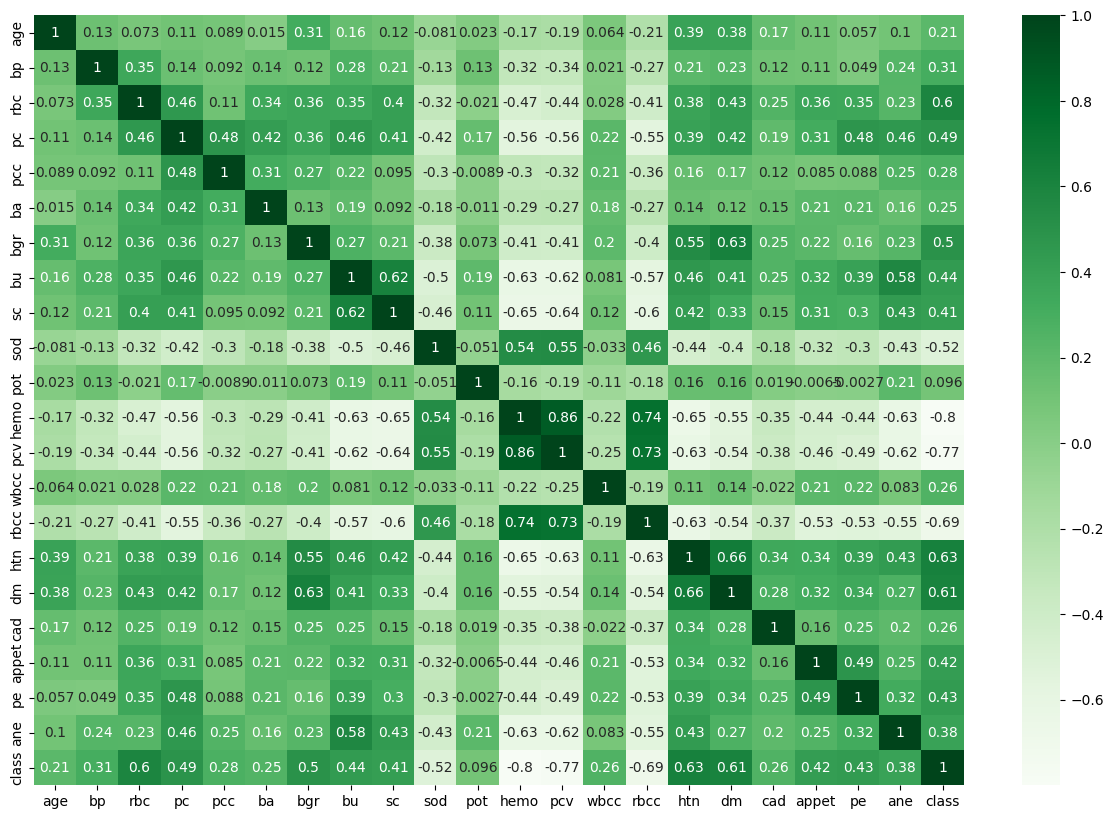

In [88]:
# Grafico de Correlacion de Pearson
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(df.corr(method='pearson'), annot=True, cmap='Greens')
plt.show()

In [89]:
matriz_corr = df.corr(method='pearson')

# vemos asi las variables importantes
np.abs(matriz_corr['class']) >= 0.7

<ipython-input-89-d92dce5cb43a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_corr = df.corr(method='pearson')


age      False
bp       False
rbc      False
pc       False
pcc      False
ba       False
bgr      False
bu       False
sc       False
sod      False
pot      False
hemo      True
pcv       True
wbcc     False
rbcc     False
htn      False
dm       False
cad      False
appet    False
pe       False
ane      False
class     True
Name: class, dtype: bool

osea que tenemos con una correlacion arriba de 0.7 con la clase siendo:
- `sg`: specific gravity
- `pcv`: packed cell volume
- `hemo`: hemoglobina [gms]

In [90]:
df.to_csv("data.csv")

## Actividad 2: PCA
Utilice PCA para determinar un conjunto reducido de variables de entrada al modelo.

Construya gráficos que muestren 2 de las nuevas dimensiones, con cada punto coloreado en base al target.

Separe el dataset en entrenamiento y testing y analice sus distribuciones.

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

df = pd.read_csv("data.csv", index_col=0)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,NaN,70.0,1.015,4.0,0.0,1.0,0.0,0.0,0.0,104.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,NaN,70.0,1.020,0.0,0.0,NaN,NaN,0.0,0.0,219.0,...,37.0,9800.0,4.4,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,55.0,70.0,1.010,3.0,0.0,NaN,0.0,0.0,0.0,99.0,...,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,60.0,70.0,1.010,0.0,0.0,NaN,0.0,0.0,0.0,140.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,72.0,90.0,1.025,1.0,3.0,NaN,0.0,0.0,0.0,323.0,...,NaN,NaN,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0


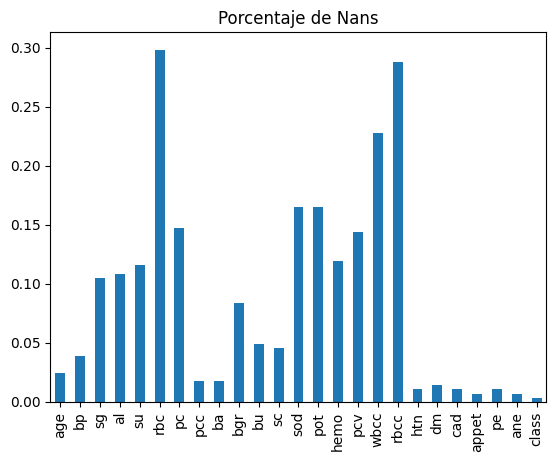

In [92]:
# porcentaje de Nan
nan_count = df.isna().sum() / df.shape[0]

nan_count.plot.bar()
plt.title("Porcentaje de Nans")
plt.show()

Existen dos opciones
1.- disponer de las columnas con mayor cantidad de Nan's
2.- luego disponer de las filas con Nan's

esto reduciria al minimo la perdida de datos

In [93]:
# al eliminar todas las filas con nans
df.dropna(axis=0).shape

(140, 25)

In [94]:
# eliminar las columnas mas problematicas y luego las filas
# nos evita perder datos, pero perdiendo información total
df = df.drop(columns=['rbc','rbcc', 'wbcc']).dropna(axis=0)
df.shape

(165, 22)

y aqui se cita la sección 1:
- de acuerdo al grafico de coorelación de Pearson, no hay una correlación importante entre la clase y estas columnas que estamos quitando; asi que nos quedaremos con el segundo metodo que nos permite guardar 25 datos más a coste de perder esas columnas.

- otra cosa es que estamos reduciendo un poco la dimensionalidad de algo que ya es bastante grande

In [95]:
features = df.iloc[:,:-1]
targets = df.iloc[:,-1]

In [96]:
X = np.array(features)

pca = PCA(n_components=2)
pca.fit(X)

print(pca.explained_variance_ratio_)

[0.73465697 0.21308929]


In [97]:
# convertimos así los datos a una versión reducida
X = pca.transform(X)
X.shape

(165, 2)

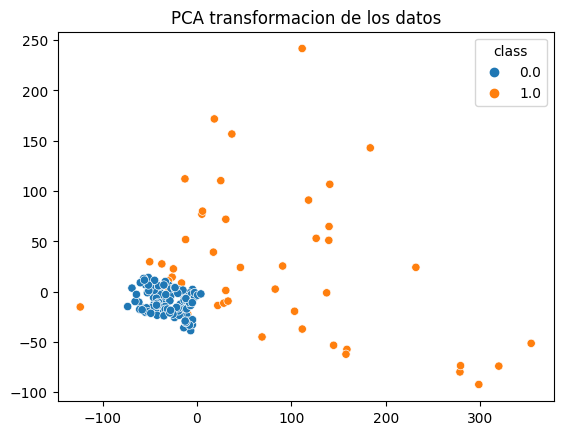

In [100]:
sns.scatterplot(x=X[:,0],y=X[:,1], hue=targets)
plt.title('PCA transformacion de los datos')
plt.show()

Separar el data set en training y testing
- para el dataset original
- para el que fue transformado por el PCA

In [101]:
X_train, X_test, y_train, y_test = train_test_split(
    features, targets, test_size=0.33, random_state=42)

In [102]:
Xp_train, Xp_test, yp_train, yp_test = train_test_split(
    X, targets, test_size=0.33, random_state=42)

## Actividad 3: Random Forest
Desarrolle un modelo, utilizando random forest, para clasificar si el paciente padece la enfermedad de riñón crónica, en base a (a) todas las variables originales y (b) sólo las componentes principales seleccionadas. Entrene usando el subconjunto de entrenamiento y alguna técnica de validación cruzada. 
Optimice los hiperparámetros para conseguir un "buen modelo".

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score

In [104]:
#Nombres de las columnas
colNames = df.columns
colNames

Index(['age', 'bp', 'sg', 'al', 'su', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'sod', 'pot', 'hemo', 'pcv', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'class'],
      dtype='object')

In [105]:
#Se renombran las columnas para acceder más facil a ellas
df.rename(columns={'class':'C'},inplace=True)

In [106]:
#Se codifican la clase con LabelEncoder()
le_C=LabelEncoder()
df['class_n']=le_C.fit_transform(df.C)

#Se codifica la variable categórica de 'class' utilizando LabelEncoder()
le = LabelEncoder()
y = le.fit_transform(targets)

#Se divide el conjunto de datos en un 80% de entrenamiento y un 20% de testeo y luego se divide el subconjunto de entrenamiento en un 80% para entrenamiento y un 20% de validación.
#Se utiliza stratify asegurar que las proporciones de las etiquetas de clase sean mantenidas de manera equitativa en los conjuntos de datos divididos.

#Se obtiene el subconjunto de datos de entrenamiento y testeo con train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Se verifica que los subconjuntos tengan la misma distribución utilizando value_counts

#Se ha utilizado un tamaño de prueba del 30%
print('Distribución del conjunto de entrenamiento:')
print(pd.Series(y_train).value_counts(normalize=True))
print('Distribución del conjunto de prueba:')
print(pd.Series(y_test).value_counts(normalize=True))

Distribución del conjunto de entrenamiento:
0.0    0.727273
1.0    0.272727
Name: class, dtype: float64
Distribución del conjunto de prueba:
0.0    0.672727
1.0    0.327273
Name: class, dtype: float64


In [107]:
#Se crea un modelo de Random Forest
rf_model = RandomForestClassifier(random_state=101)

# Aplicar validación cruzada de k-fold
scores = cross_val_score(rf_model, X_train, y_train, cv=5)

# Mostrar los resultados
print(f"Precisión media de validación cruzada: {scores.mean():.3f}")

Precisión media de validación cruzada: 1.000


In [108]:



#Se definen los hiperparámetros para la optimización
param_grid = {
    'n_estimators': [5, 10, 15, 20],
    'max_depth': [1, 2, 4],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]}
#En donde los parametros son:
#n_estimators: indica el número de árboles de Random Forest
#max_depth: indica la profundidad máxima permitida para Random Forest
#min_samples_split: indica el número mínimo de muestras requeridas para dividir un nodo en un árbol
#min_samples_leaf: indica el número mínimo de muestras requeridas en una hoja de un árbol
#bootstrap: indica si se debe usar o no el muestreo con reemplazo en la construcción de cada árbol del bosque

#Se realiza una búsqueda de los mejores hiperparámetros utilizando validación cruzada para encontrar el mejor modelo utilizando GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

#Se obtienen los mejores hiperparámetros para el mejor modelo con best_params_
best_params = grid_search.best_params_

#Se crea el mejor modelo de Random forest utilizando los mejores hiperparámetros encontrados
best_rf_model = RandomForestClassifier(**best_params)

#Se entrena el mejor modelo de Random forest  con el subconjunto de entrenamiento
best_rf_model.fit(X_train, y_train)

# Predecir los valores en el conjunto de prueba
y_pred = best_rf_model.predict(X_test)

#Se calcula la precisión del mejor modelo en el subconjunto de entrenamiento utilizando accuracy_score
accuracy = accuracy_score(y_test, y_pred)




#Se imprimen los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados: ", best_params)
#Se imprime la precisión del mejor modelo al utilizarlo en el subconjunto de validación
print("Precisión del modelo utilizando el subconjunto de validación: ", accuracy)

Mejores hiperparámetros encontrados:  {'bootstrap': True, 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Precisión del modelo utilizando el subconjunto de validación:  0.9636363636363636


## Actividad 4: Support Vector Machine
Repita la actividad 3, pero usando SVM. 

Discuta cuál de las metodologías (SVM, RF, todas las variables, PCs, etc.) proporcionó el mejor modelo, utilice el dataset de testing para este propósito.